In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="debee8d1a1092fd0ca4570863e6c2100eaa113bc"

In [3]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

C:\Users\mohan\AppData\Roaming\Python\Python310\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('TSLA.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('TSLA.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-06-04 00:00:00+00:00,296.74,299.00,293.55,294.34,4797810,19.782667,19.933333,19.570000,19.622667,71967150,0.0,1.0
1,TSLA,2018-06-05 00:00:00+00:00,291.13,297.80,286.74,297.70,5995157,19.408667,19.853333,19.116000,19.846667,89927355,0.0,1.0
2,TSLA,2018-06-06 00:00:00+00:00,319.50,322.17,297.48,300.50,18767269,21.300000,21.478000,19.832000,20.033333,281509035,0.0,1.0
3,TSLA,2018-06-07 00:00:00+00:00,316.09,330.00,313.58,316.15,14345271,21.072667,22.000000,20.905333,21.076667,215179065,0.0,1.0
4,TSLA,2018-06-08 00:00:00+00:00,317.66,324.48,317.15,319.00,8205202,21.177333,21.632000,21.143333,21.266667,123078030,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2023-05-25 00:00:00+00:00,184.47,186.78,180.58,186.54,96870719,184.47,186.78,180.58,186.54,96870719,0.0,1.0
1254,TSLA,2023-05-26 00:00:00+00:00,193.17,198.60,184.53,184.62,162061496,193.17,198.60,184.53,184.62,162061496,0.0,1.0
1255,TSLA,2023-05-30 00:00:00+00:00,201.16,204.48,197.53,200.10,128818746,201.16,204.48,197.53,200.10,128818746,0.0,1.0
1256,TSLA,2023-05-31 00:00:00+00:00,203.93,203.95,195.12,199.78,149356274,203.93,203.95,195.12,199.78,149356274,0.0,1.0
1257,TSLA,2023-06-01 00:00:00+00:00,207.52,209.80,199.37,202.59,148029931,207.52,209.80,199.37,202.59,148029931,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       296.74
1       291.13
2       319.50
3       316.09
4       317.66
         ...  
1253    184.47
1254    193.17
1255    201.16
1256    203.93
1257    207.52
Name: close, Length: 1258, dtype: float64

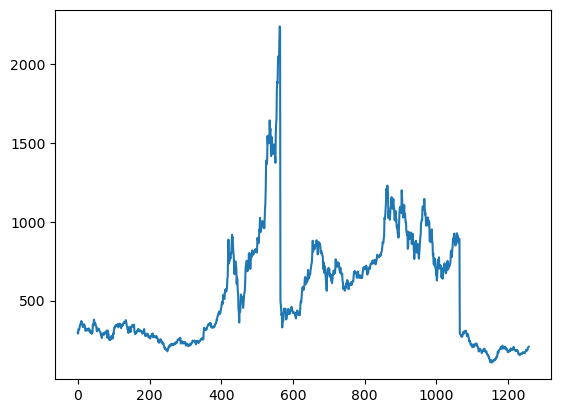

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.08853636]
 [0.08590336]
 [0.09921855]
 ...
 [0.04367681]
 [0.04497688]
 [0.04666182]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:

training_size,test_size

(1006, 252)

In [18]:
train_data

array([[0.08853636],
       [0.08590336],
       [0.09921855],
       ...,
       [0.28143055],
       [0.30578931],
       [0.30514632]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(905, 100)
(905,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 20s 550ms/step - loss: 0.0288 - val_loss: 0.0035
Epoch 2/100
15/15 [==============================] - 6s 389ms/step - loss: 0.0099 - val_loss: 0.0036
Epoch 3/100
15/15 [==============================] - 6s 415ms/step - loss: 0.0068 - val_loss: 1.5236e-04
Epoch 4/100
15/15 [==============================] - 6s 384ms/step - loss: 0.0063 - val_loss: 0.0011
Epoch 5/100
15/15 [==============================] - 5s 365ms/step - loss: 0.0059 - val_loss: 6.6021e-04
Epoch 6/100
15/15 [==============================] - 6s 379ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 7/100
15/15 [==============================] - 6s 384ms/step - loss: 0.0061 - val_loss: 2.5238e-04
Epoch 8/100
15/15 [==============================] - 6s 369ms/step - loss: 0.0061 - val_loss: 0.0023
Epoch 9/100
15/15 [==============================] - 6s 397ms/step - loss: 0.0049 - val_loss: 1.3658e-04
Epoch 10/100
15/15 [==============================] - 6s 387ms/step - loss

15/15 [==============================] - 6s 377ms/step - loss: 0.0010 - val_loss: 1.1683e-04
Epoch 79/100
15/15 [==============================] - 5s 362ms/step - loss: 0.0012 - val_loss: 7.6109e-05
Epoch 80/100
15/15 [==============================] - 5s 328ms/step - loss: 0.0011 - val_loss: 6.2199e-05
Epoch 81/100
15/15 [==============================] - 5s 302ms/step - loss: 8.9415e-04 - val_loss: 4.3581e-05
Epoch 82/100
15/15 [==============================] - 5s 324ms/step - loss: 9.4777e-04 - val_loss: 2.0915e-04
Epoch 83/100
15/15 [==============================] - 5s 324ms/step - loss: 0.0013 - val_loss: 2.2553e-04
Epoch 84/100
15/15 [==============================] - 5s 324ms/step - loss: 9.3487e-04 - val_loss: 4.4409e-05
Epoch 85/100
15/15 [==============================] - 5s 331ms/step - loss: 9.9855e-04 - val_loss: 6.0074e-05
Epoch 86/100
15/15 [==============================] - 5s 339ms/step - loss: 9.5283e-04 - val_loss: 1.4433e-04
Epoch 87/100
15/15 [===================

In [28]:
import tensorflow as tf

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 71ms/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
# calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict))

# calculate accuracy percentage
max_val = scaler.inverse_transform([[1]])[0,0]
min_val = scaler.inverse_transform([[0]])[0,0]
train_accuracy = 100 - train_rmse * 100 / (max_val - min_val)
test_accuracy = 100 - test_rmse * 100 / (max_val - min_val)

# print results
print(f"Train RMSE: {train_rmse:.2f}, Train Accuracy: {train_accuracy:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}, Test Accuracy: {test_accuracy:.2f}%")


Train RMSE: 705.27, Train Accuracy: 66.90%
Test RMSE: 171.37, Test Accuracy: 91.96%


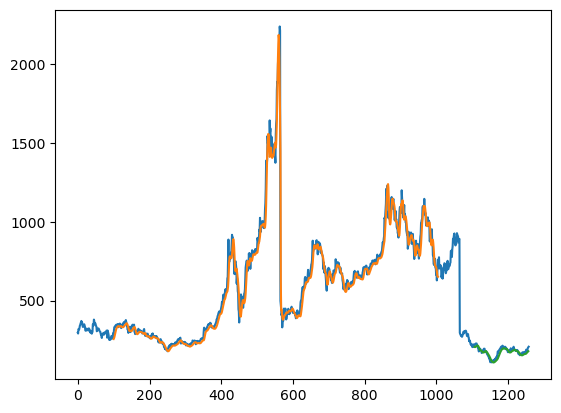

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:

len(test_data)

252

In [34]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.00547720179288011,
 0.005045408678102929,
 0.007096425973294539,
 0.007256001689625237,
 0.006711566892732272,
 0.01097787060286768,
 0.009705958275643585,
 0.008950320324783524,
 0.01188369746321545,
 0.01673198319761575,
 0.01679769084551662,
 0.017051134630277145,
 0.02448548564991905,
 0.03275995588200785,
 0.027484570436251854,
 0.030563443080750013,
 0.034407340482951215,
 0.03762701523009411,
 0.03842958721516908,
 0.04067303405064182,
 0.0416351817520475,
 0.04373782648487551,
 0.04656794874803463,
 0.04167272897941943,
 0.04061671320958392,
 0.047473775608382424,
 0.049815783915706485,
 0.04408983174148734,
 0.047032595686762255,
 0.04189801234365101,
 0.043536010137751394,
 0.04410391195175181,
 0.041668035575997936,
 0.04671344425410086,
 0.04581231079717457,
 0.04443245019125619,
 0.038861380329946266,
 0.04209513528735362,
 0.040227160725600175,
 0.0373641846384906,
 0.034684251284819195,
 0.030422640978105264,
 0.03066669795602281,
 0.031154811911857885,
 0.03527562011

In [37]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.03675478]
101
1 day input [0.00504541 0.00709643 0.007256   0.00671157 0.01097787 0.00970596
 0.00895032 0.0118837  0.01673198 0.01679769 0.01705113 0.02448549
 0.03275996 0.02748457 0.03056344 0.03440734 0.03762702 0.03842959
 0.04067303 0.04163518 0.04373783 0.04656795 0.04167273 0.04061671
 0.04747378 0.04981578 0.04408983 0.0470326  0.04189801 0.04353601
 0.04410391 0.04166804 0.04671344 0.04581231 0.04443245 0.03886138
 0.04209514 0.04022716 0.03736418 0.03468425 0.03042264 0.0306667
 0.03115481 0.03527562 0.03395677 0.03568395 0.03380658 0.03527093
 0.04199657 0.03897872 0.03948091 0.0386314  0.03928848 0.03805881
 0.04026001 0.04091709 0.04663366 0.04067773 0.03964987 0.03633633
 0.03612043 0.0358623  0.03693239 0.03399901 0.03651468 0.03609227
 0.03704973 0.03576843 0.03402248 0.02576209 0.02674301 0.02555558
 0.02467322 0.02142539 0.02444794 0.02638162 0.02521766 0.02450426
 0.02464506 0.02492197 0.02908033 0.02989229 0.02865323 0.02836693
 0.0300284  0.0281041  0.02733907 

8 day output [[0.03353773]]
9 day input [0.01673198 0.01679769 0.01705113 0.02448549 0.03275996 0.02748457
 0.03056344 0.03440734 0.03762702 0.03842959 0.04067303 0.04163518
 0.04373783 0.04656795 0.04167273 0.04061671 0.04747378 0.04981578
 0.04408983 0.0470326  0.04189801 0.04353601 0.04410391 0.04166804
 0.04671344 0.04581231 0.04443245 0.03886138 0.04209514 0.04022716
 0.03736418 0.03468425 0.03042264 0.0306667  0.03115481 0.03527562
 0.03395677 0.03568395 0.03380658 0.03527093 0.04199657 0.03897872
 0.03948091 0.0386314  0.03928848 0.03805881 0.04026001 0.04091709
 0.04663366 0.04067773 0.03964987 0.03633633 0.03612043 0.0358623
 0.03693239 0.03399901 0.03651468 0.03609227 0.03704973 0.03576843
 0.03402248 0.02576209 0.02674301 0.02555558 0.02467322 0.02142539
 0.02444794 0.02638162 0.02521766 0.02450426 0.02464506 0.02492197
 0.02908033 0.02989229 0.02865323 0.02836693 0.0300284  0.0281041
 0.02733907 0.02741886 0.03086382 0.03228592 0.03381128 0.03790862
 0.03645366 0.03510666 0

16 day output [[0.02671943]]
17 day input [0.03762702 0.03842959 0.04067303 0.04163518 0.04373783 0.04656795
 0.04167273 0.04061671 0.04747378 0.04981578 0.04408983 0.0470326
 0.04189801 0.04353601 0.04410391 0.04166804 0.04671344 0.04581231
 0.04443245 0.03886138 0.04209514 0.04022716 0.03736418 0.03468425
 0.03042264 0.0306667  0.03115481 0.03527562 0.03395677 0.03568395
 0.03380658 0.03527093 0.04199657 0.03897872 0.03948091 0.0386314
 0.03928848 0.03805881 0.04026001 0.04091709 0.04663366 0.04067773
 0.03964987 0.03633633 0.03612043 0.0358623  0.03693239 0.03399901
 0.03651468 0.03609227 0.03704973 0.03576843 0.03402248 0.02576209
 0.02674301 0.02555558 0.02467322 0.02142539 0.02444794 0.02638162
 0.02521766 0.02450426 0.02464506 0.02492197 0.02908033 0.02989229
 0.02865323 0.02836693 0.0300284  0.0281041  0.02733907 0.02741886
 0.03086382 0.03228592 0.03381128 0.03790862 0.03645366 0.03510666
 0.03584352 0.03992678 0.04367681 0.04497688 0.04666182 0.03675478
 0.03771774 0.03785584

24 day output [[0.02004868]]
25 day input [0.04747378 0.04981578 0.04408983 0.0470326  0.04189801 0.04353601
 0.04410391 0.04166804 0.04671344 0.04581231 0.04443245 0.03886138
 0.04209514 0.04022716 0.03736418 0.03468425 0.03042264 0.0306667
 0.03115481 0.03527562 0.03395677 0.03568395 0.03380658 0.03527093
 0.04199657 0.03897872 0.03948091 0.0386314  0.03928848 0.03805881
 0.04026001 0.04091709 0.04663366 0.04067773 0.03964987 0.03633633
 0.03612043 0.0358623  0.03693239 0.03399901 0.03651468 0.03609227
 0.03704973 0.03576843 0.03402248 0.02576209 0.02674301 0.02555558
 0.02467322 0.02142539 0.02444794 0.02638162 0.02521766 0.02450426
 0.02464506 0.02492197 0.02908033 0.02989229 0.02865323 0.02836693
 0.0300284  0.0281041  0.02733907 0.02741886 0.03086382 0.03228592
 0.03381128 0.03790862 0.03645366 0.03510666 0.03584352 0.03992678
 0.04367681 0.04497688 0.04666182 0.03675478 0.03771774 0.03785584
 0.03746389 0.03679902 0.03601824 0.03519835 0.03436904 0.03353773
 0.03270369 0.0318645

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1258

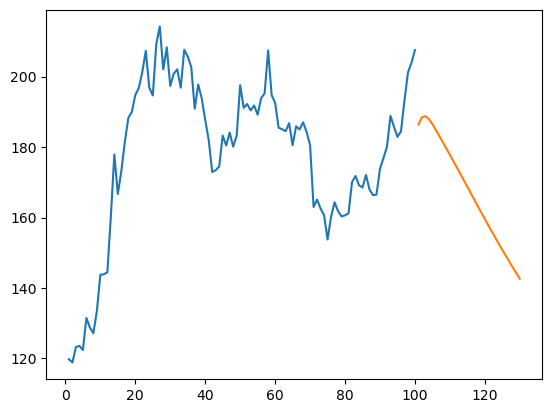

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


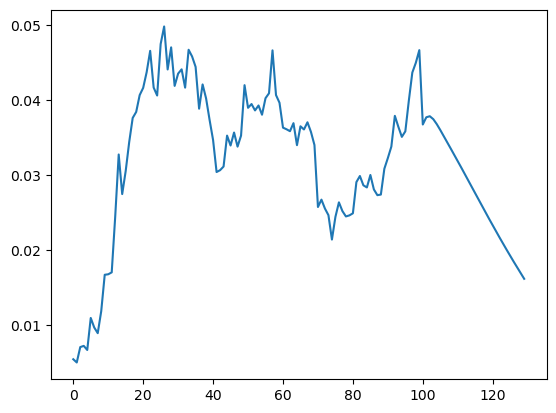

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1158:])


In [44]:
df3=scaler.inverse_transform(df3).tolist()

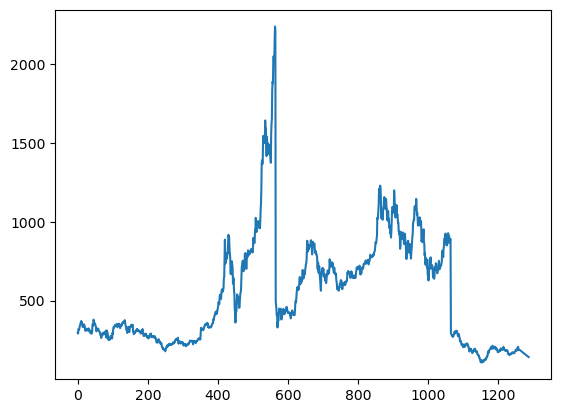

In [45]:
plt.plot(df3)